# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att9'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

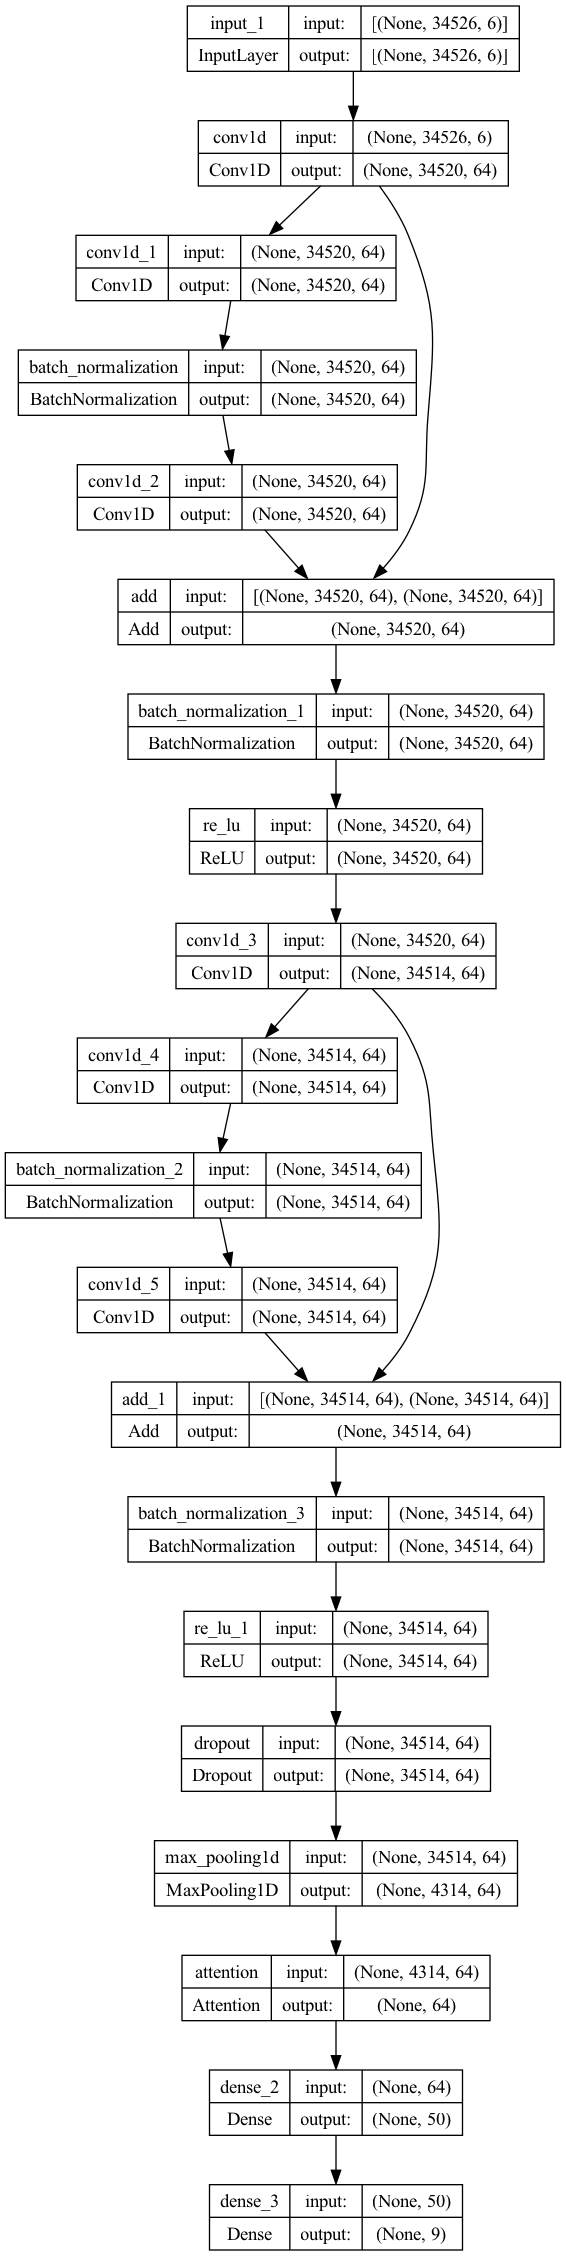

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 34520, 64)            2688      ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 34520, 64)            45120     ['conv1d[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 34520, 64)            256       ['conv1d_1[0][0]']            
 Normalization)                                                                               

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 1596s 5s/step - loss: 113.6071 - ERM: -0.0205 - KDEL: 0.0221 - LMA: 0.0387 - MITO: 0.0368 - NES: -0.0078 - NIK: 6.7452e-05 - NLS: 0.0052 - NUCP: 0.0070 - OMM: -0.0289 - val_loss: 56.7824 - val_ERM: -7.9073e-14 - val_KDEL: 9.9924e-05 - val_LMA: -0.4276 - val_MITO: -0.0861 - val_NES: -5.4686e-04 - val_NIK: -6.0579e-04 - val_NLS: -6.9842e-08 - val_NUCP: -6.4092e-16 - val_OMM: 0.0877
Epoch 2/10
311/311 [==============================] - 1572s 5s/step - loss: 37.8110 - ERM: -0.0204 - KDEL: 0.0536 - LMA: 0.0567 - MITO: 0.0619 - NES: -0.0100 - NIK: -0.0129 - NLS: 0.0179 - NUCP: 0.0185 - OMM: -0.0226 - val_loss: 67.0644 - val_ERM: 0.1172 - val_KDEL: 1.1702e-11 - val_LMA: 0.4607 - val_MITO: 1.0899e-04 - val_NES: -5.7304e-04 - val_NIK: -0.4479 - val_NLS: 4.4624e-06 - val_NUCP: -5.4888e-06 - val_OMM: -1.0355e-04
Epoch 3/10
311/311 [==============================] - 1693s 5s/step - loss: 36.8110 - ERM: -0.0122 - KDEL: 0.0545 - LMA: 0.0508 - MIT

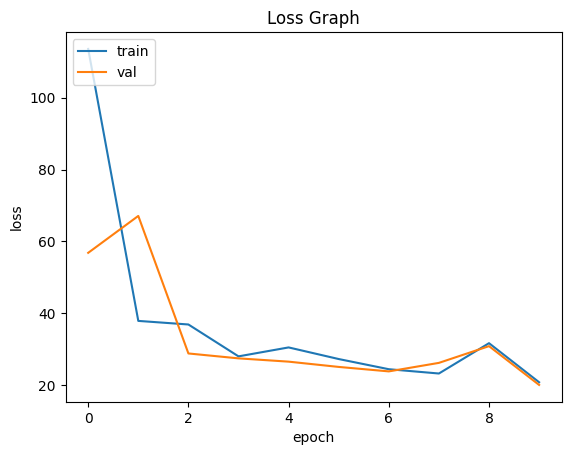

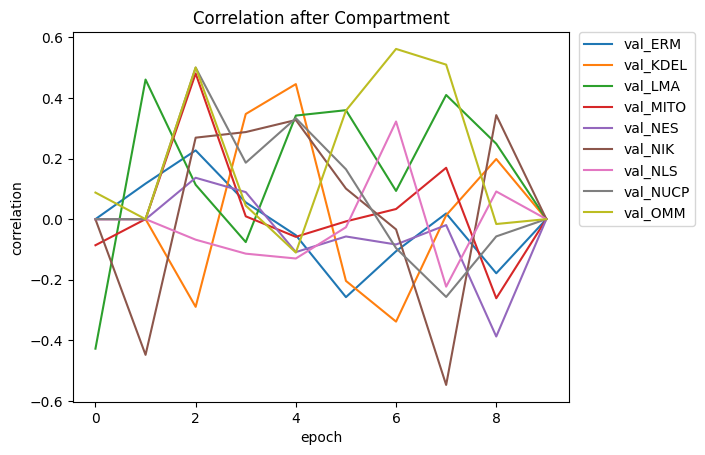

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

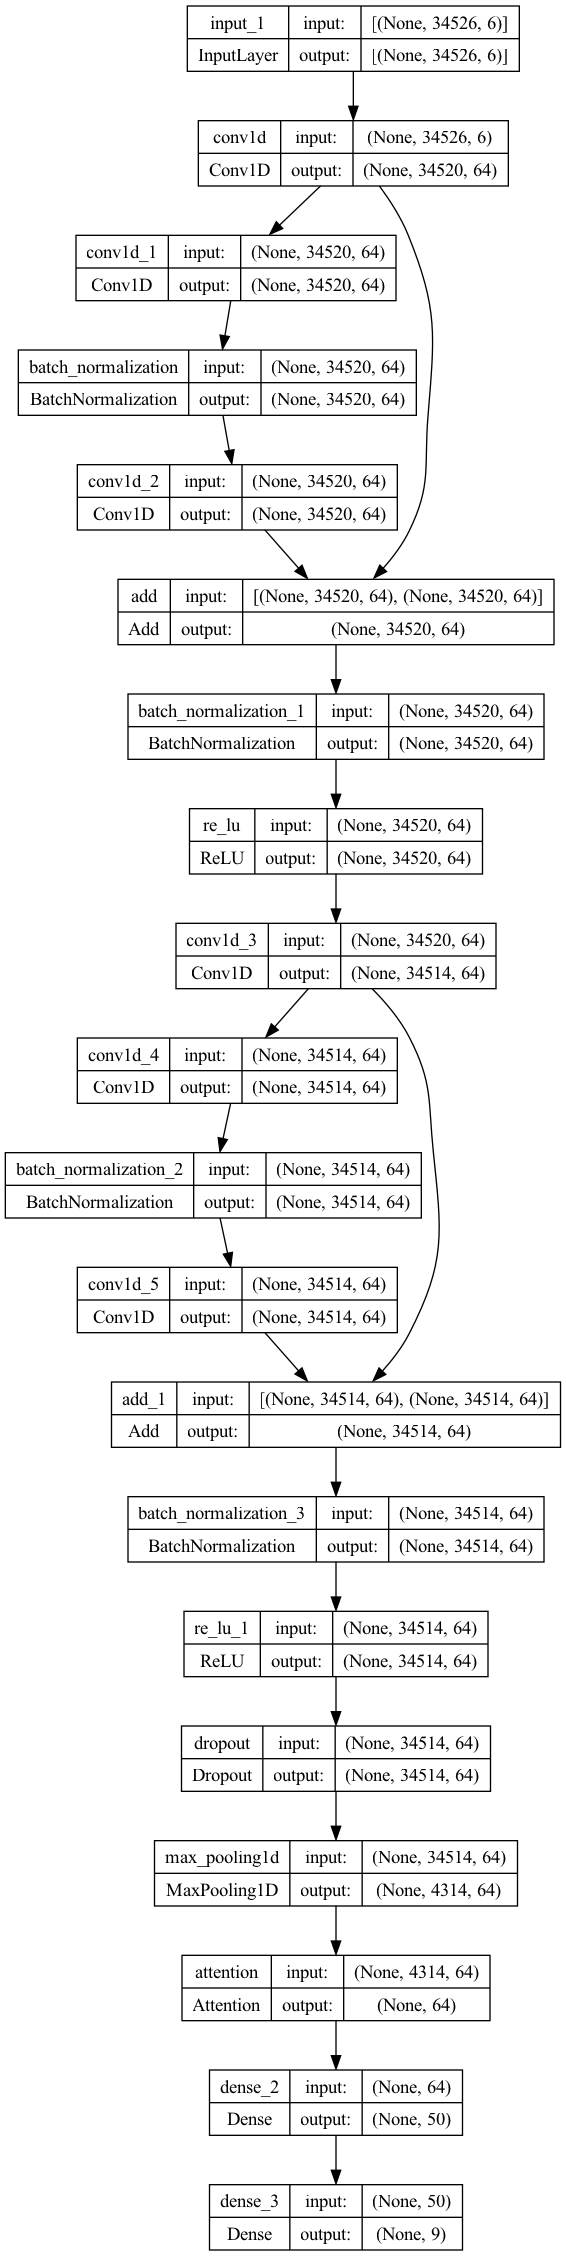

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)